In [13]:
import spacy
import pandas as pd

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

df = pd.read_excel('event-details1.xlsx')

# Function to extract keywords from event names
def extract_keywords(event_name):
    doc = nlp(event_name)
    keywords = [token.text.lower() for token in doc if token.is_alpha and not token.is_stop]
    return keywords

# Apply the function to create a new column with keywords
df['Keywords'] = df['Description'].apply(extract_keywords)
# Assuming 'col' is the column with lists that you want to convert to strings
df['desc'] = df['Keywords'].apply(lambda x: ', '.join(map(str, x)))

df.to_csv('nlp1.csv', index=False)

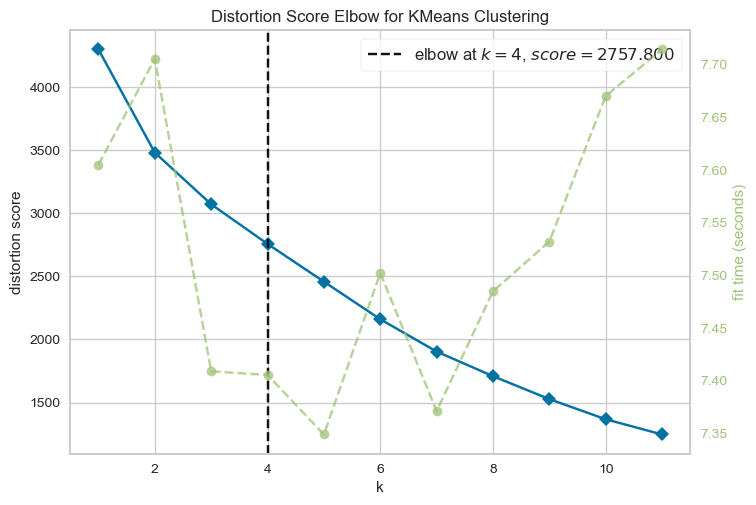

In [11]:
from gensim.models import Word2Vec
import pandas as pd
import numpy as np
import matplotlib.image as image
import matplotlib.pyplot as plt
%matplotlib inline
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('nlp1.csv')

# Tokenize event names into words
tokenized_events = df['desc'].apply(lambda x: x.lower().split())

# Train a Word2Vec model
model = Word2Vec(sentences=tokenized_events, vector_size=100, window=5, min_count=1, workers=4)

# Function to get the vector representation of an event name
def get_event_vector(event_name):
    event_tokens = event_name.lower().split()
    vector_sum = sum(model.wv[token] for token in event_tokens if token in model.wv)
    return vector_sum / len(event_tokens) if len(event_tokens) > 0 else None

# Get vectors for all event names
df['EventVector'] = df['desc'].apply(get_event_vector)

# Remove rows with missing vectors
df = df.dropna()

# Use K-means clustering to categorize events
event_vectors = pd.DataFrame(df['EventVector'].to_list())
scaler = StandardScaler()
scaled_vectors = scaler.fit_transform(event_vectors)

# Instantiate the clustering model and visualizer
model = KMeans(n_init = 100)
visualizer = KElbowVisualizer(model, k=(1, 12))

visualizer.fit(scaled_vectors) # Fit the data to the visualizer
visualizer.show(outpath = 'elbow1.png') # Finalize and render the figure
plt.show()

In [8]:
kmeans = KMeans(n_clusters=8, random_state=42, n_init = 200)
df['Department'] = kmeans.fit_predict(scaled_vectors)

# Display the result
#print(df[['title', 'Department']])

maths_keywords = [
    "calculus",
    "algebra",
    "statistics",
    "data analysis",
    "probability",
    "discrete mathematics",
    "linear algebra",
    "differential equations",
    "optimization",
    "game theory"
]

business_startup_keywords = [
    "entrepreneurship",
    "venture capital",
    "marketing strategies",
    "financial management",
    "business development",
    "leadership",
    "project management",
    "innovation",
    "negotiation",
    "shark tank",
    "product development"
]

ai_keywords = [
    "machine learning",
    "deep learning",
    "llms",
    "ai",
    "natural language processing",
    "computer vision",
    "robotics",
    "artificial neural networks",
    "reinforcement learning",
    "big data analytics",
    "algorithmic bias",
    "explainable ai"
]

iot_keywords = [
    "connected devices",
    "smart homes",
    "wearable technology",
    "sensor networks",
    "industrial iot",
    "big data and analytics",
    "security and privacy",
    "cloud computing"
]

blockchain_keywords = [
    "cryptocurrency",
    "blockchain",
    "distributed ledger technology",
    "smart contracts",
    "security and scalability",
    "blockchain platforms"
]

cloud_computing_keywords = [
    "cloud",
    "cloud storage",
    "cloud architecture",
    "software as a service (saas)",
    "platform as a service (paas)",
    "infrastructure as a service (iaas)",
    "scalability and elasticity",
    "security and compliance",
    "cloud migration strategies",
    "public cloud",
    "private cloud",
    "hybrid cloud",
    "cloud-native development"
]

research_conference_keywords = [
    "scholarly research",
    "conference",
    "research methods",
    "grant writing",
    "presentation skills",
    "networking with experts",
    "collaboration and teamwork",
    "interdisciplinary research",
    "open access publishing"
]

cultural_festival_keywords = [
    "diversity and inclusion",
    "global awareness",
    "arts and crafts",
    "music and dance",
    "food and cuisine",
    "religious celebrations",
    "historical reenactments",
    "community building",
    "cultural exchange"
]

movies_shortfilms_keywords = [
    "film",
    "storytelling",
    "cinematography",
    "acting",
    "directing",
    "animation",
    "documentary films",
    "independent cinema",
    "global cinema",
    "film festivals"
]

web_development_keywords = [
    "front-end development",
    "back-end development",
    "wed",
    "development",
    "user interface (ui) design",
    "user experience (ux) design",
    "html",
    "css",
    "web accessibility",
    "content management systems (cms)",
    "web security",
    "web performance optimization"
]

app_development_keywords = [
    "app development",
    "native vs. hybrid apps",
    "app design",
    "flutter",
    "kotlin",
    "app development tools",
    "app marketing and distribution",
    "monetization strategies",
    "user engagement",
    "augmented reality (ar)",
    "virtual reality (vr)",
    "emerging trends",
    "cross-platform development"
]

literature_keywords = [
    "literature",
    "fiction",
    "non-fiction",
    "poetry"
]
df['category']=''
import ast

for i in range(43):
    a=df['Keywords'].iloc[i]
    a=ast.literal_eval(a)
    for j in a:
        if(j in research_conference_keywords):
            df['category'].iloc[i]='research and conference'
            break;
        elif(j in literature_keywords):
            df['category'].iloc[i]='literature'
            break;
        elif(j in app_development_keywords):
            df['category'].iloc[i]='app development'
            break;
        elif(j in web_development_keywords):
            df['category'].iloc[i]='web development'
            break;
        elif(j in movies_shortfilms_keywords):
            df['category'].iloc[i]='film making'
            break;   
        elif(j in cultural_festival_keywords):
            df['category'].iloc[i]='culture'
            break;
        elif(j in cloud_computing_keywords):
            df['category'].iloc[i]='cloud computing'
            break;
        elif(j =='law'):
            df['category'].iloc[i]='law'
            break;
        elif(j in blockchain_keywords):
            df['category'].iloc[i]='block chain'
            break;
        elif(j in iot_keywords):
            df['category'].iloc[i]='iot'
            break;
        elif(j in ai_keywords):
            df['category'].iloc[i]="artificial intelligence"
            break;
        elif(j=='faculty'):
            df['category'].iloc[i]="faculty"
            break;
        elif(j=='cyber')
            df['category'].iloc[i]="cyber security"
            break;
        elif(j=='c' or j=='java'):
            df['category'].iloc[i]="programming"
            break;
        elif(j in maths_keywords):
            df['category'].iloc[i]="maths"
            break;

df.to_csv('nlp2.csv',index=False)
print('sucessful')


sucessful


<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 43 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

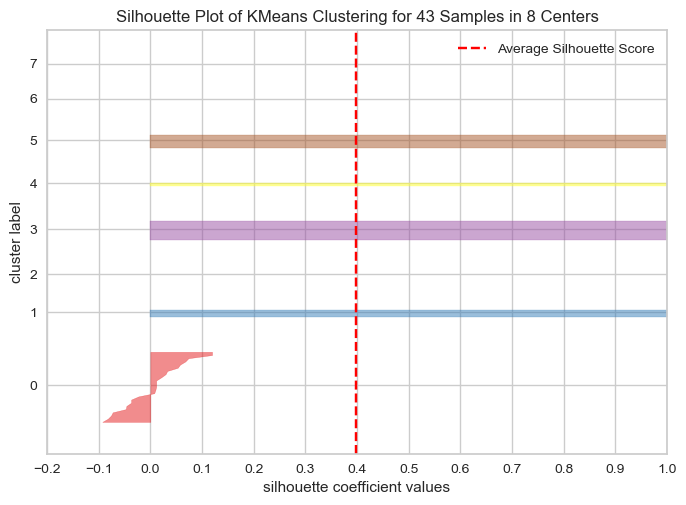

In [18]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt

# Instantiate the KMeans model
kmeans = KMeans(n_clusters=8, init='k-means++', max_iter=300, n_init=100, random_state=0)

# Fit the KMeans model
kmeans.fit(scaled_vectors)

# Instantiate the SilhouetteVisualizer
visualizer = SilhouetteVisualizer(kmeans)

# Fit the visualizer
visualizer.fit(scaled_vectors)

# Plot the silhouette score
visualizer.show(outpath="sil1.png")


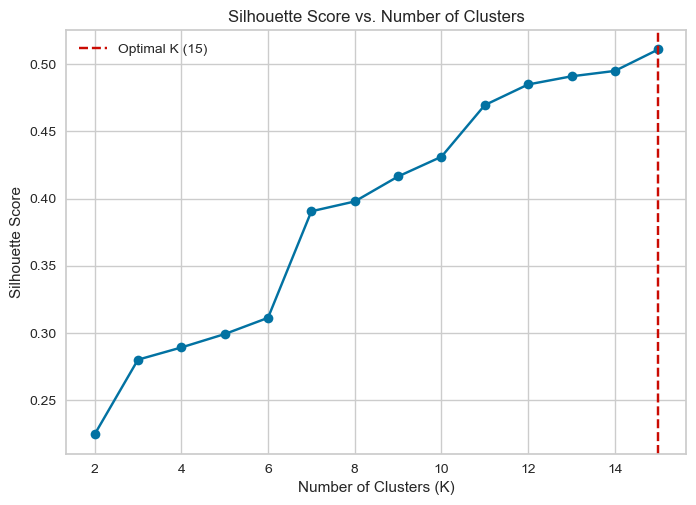

Optimal number of clusters (K): 15


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Set the range of K values to try
k_values = range(2, 16)

# Initialize lists to store silhouette scores
silhouette_scores = []

# Iterate over different K values
for k in k_values:
    # Instantiate the KMeans model
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=100, random_state=0)
    
    # Fit the KMeans model
    kmeans.fit(scaled_vectors)
    
    # Calculate the silhouette score
    score = silhouette_score(scaled_vectors, kmeans.labels_)
    
    # Append the silhouette score to the list
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')

# Find the optimal K value with the highest silhouette score
optimal_k = k_values[np.argmax(silhouette_scores)]

# Highlight the optimal K value on the graph
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal K ({optimal_k})')
plt.legend()

plt.savefig('silhouette_scores.png', dpi=350)
plt.show()

print("Optimal number of clusters (K):", optimal_k)


In [10]:
import pandas as pd
import numpy as np
from sklearn import metrics
df = pd.read_csv('nlp2.csv')

print('Mean Absolute Error:', metrics.mean_absolute_error(df['y'], df['Department']))
print('Mean Squared Error:', metrics.mean_squared_error(df['y'], df['Department']))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df['y'], df['Department'])))

Mean Absolute Error: 1.441860465116279
Mean Squared Error: 4.465116279069767
Root Mean Squared Error: 2.113082175181497
